<a href="https://colab.research.google.com/github/subodh2708/deep-learning---tensorflow-2.0/blob/main/03_Introduction_to_CNN_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional neural network and Computer Vision in tensorflow

In [73]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-08-16 15:57:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   154MB/s    in 0.7s    

2022-08-16 15:57:35 (154 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data

In [74]:
!ls pizza_steak

test  train


In [75]:
!ls pizza_steak/train/

pizza  steak


In [76]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [77]:
import os

for dirpath, dirnames,filenames in os.walk('pizza_steak'):
  print(f'there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

there are 2 directories and 0 images in pizza_steak
there are 2 directories and 0 images in pizza_steak/train
there are 0 directories and 750 images in pizza_steak/train/steak
there are 0 directories and 750 images in pizza_steak/train/pizza
there are 2 directories and 0 images in pizza_steak/test
there are 0 directories and 250 images in pizza_steak/test/steak
there are 0 directories and 250 images in pizza_steak/test/pizza


In [78]:
len(os.listdir("pizza_steak/train/steak"))

750

In [79]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [80]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir , target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title('target class')
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


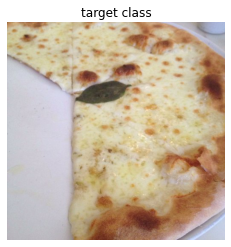

In [81]:
img = view_random_image(target_dir = "pizza_steak/train/", target_class = "pizza")

In [82]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[153, 106,  62],
        [157, 110,  66],
        [163, 116,  70],
        ...,
        [167, 181, 216],
        [167, 181, 216],
        [171, 185, 220]],

       [[156, 109,  65],
        [160, 113,  69],
        [167, 120,  74],
        ...,
        [168, 182, 217],
        [170, 184, 219],
        [176, 190, 225]],

       [[160, 113,  69],
        [165, 118,  74],
        [173, 125,  79],
        ...,
        [168, 182, 217],
        [171, 185, 220],
        [177, 191, 226]],

       ...,

       [[184, 181, 188],
        [183, 180, 187],
        [182, 179, 186],
        ...,
        [198, 206, 219],
        [198, 206, 219],
        [198, 206, 219]],

       [[184, 181, 188],
        [183, 180, 187],
        [181, 178, 185],
        ...,
        [198, 206, 219],
        [198, 206, 219],
        [198, 206, 219]],

       [[181, 178, 185],
        [180, 177, 184],
        [179, 176, 183],
        ...,
        [198, 206, 21

In [83]:
img/255.

array([[[0.6       , 0.41568627, 0.24313725],
        [0.61568627, 0.43137255, 0.25882353],
        [0.63921569, 0.45490196, 0.2745098 ],
        ...,
        [0.65490196, 0.70980392, 0.84705882],
        [0.65490196, 0.70980392, 0.84705882],
        [0.67058824, 0.7254902 , 0.8627451 ]],

       [[0.61176471, 0.42745098, 0.25490196],
        [0.62745098, 0.44313725, 0.27058824],
        [0.65490196, 0.47058824, 0.29019608],
        ...,
        [0.65882353, 0.71372549, 0.85098039],
        [0.66666667, 0.72156863, 0.85882353],
        [0.69019608, 0.74509804, 0.88235294]],

       [[0.62745098, 0.44313725, 0.27058824],
        [0.64705882, 0.4627451 , 0.29019608],
        [0.67843137, 0.49019608, 0.30980392],
        ...,
        [0.65882353, 0.71372549, 0.85098039],
        [0.67058824, 0.7254902 , 0.8627451 ],
        [0.69411765, 0.74901961, 0.88627451]],

       ...,

       [[0.72156863, 0.70980392, 0.7372549 ],
        [0.71764706, 0.70588235, 0.73333333],
        [0.71372549, 0

# An end to end example

In [84]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory= train_dir,
                                               target_size=(224,224),
                                               batch_size= 32,
                                               class_mode = 'binary',
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = train_dir,
                                              target_size= (224,224),
                                              batch_size = 32,
                                              class_mode = "binary",
                                              seed= 42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding= 'valid'),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss ='binary_crossentropy',
                optimizer='Adam',
                metrics = ['Accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch= len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 515ms/step - loss: 1.3958 - Accuracy: 0.5293 - val_loss: 0.6142 - val_Accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 13s 284ms/step - loss: 0.5758 - Accuracy: 0.7187 - val_loss: 0.4867 - val_Accuracy: 0.7727
Epoch 3/5
47/47 [==============================] - 13s 283ms/step - loss: 0.4864 - Accuracy: 0.7787 - val_loss: 0.4888 - val_Accuracy: 0.7993
Epoch 4/5
47/47 [==============================] - 13s 280ms/step - loss: 0.5965 - Accuracy: 0.7427 - val_loss: 0.5301 - val_Accuracy: 0.7327
Epoch 5/5
47/47 [==============================] - 13s 280ms/step - loss: 0.4679 - Accuracy: 0.8020 - val_loss: 0.5086 - val_Accuracy: 0.7707


In [85]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation ='relu'),
    tf.keras.layers.Dense(4,activation ='relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

model_2.compile(loss = 'binary_crossentropy',
                optimizer =tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch= len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data)
            )

Epoch 1/5
47/47 [==============================] - 13s 267ms/step - loss: 2.2923 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 12s 263ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 12s 263ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 13s 275ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 12s 262ms/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000


In [86]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model_3.compile(loss = 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics =['accuracy'])

history_3 = model_3.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch= len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 265ms/step - loss: 6.7248 - accuracy: 0.5980 - val_loss: 1.2720 - val_accuracy: 0.6653
Epoch 2/5
47/47 [==============================] - 12s 260ms/step - loss: 1.1113 - accuracy: 0.6813 - val_loss: 0.5862 - val_accuracy: 0.7527
Epoch 3/5
47/47 [==============================] - 12s 260ms/step - loss: 0.6707 - accuracy: 0.7507 - val_loss: 0.3834 - val_accuracy: 0.8393
Epoch 4/5
47/47 [==============================] - 12s 261ms/step - loss: 1.0362 - accuracy: 0.7007 - val_loss: 0.9615 - val_accuracy: 0.6747
Epoch 5/5
47/47 [==============================] - 16s 339ms/step - loss: 0.6232 - accuracy: 0.7660 - val_loss: 0.4263 - val_accuracy: 0.8113


In [87]:
model_3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 150528)            0         
                                                                 
 dense_15 (Dense)            (None, 100)               15052900  
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


# Binary Classification : let's break it down

##1. Become one with data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


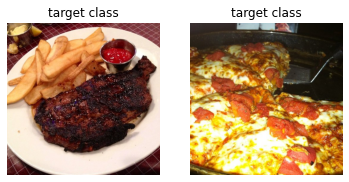

In [88]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

##2. Preprocessing the data(prepare it for model)

In [89]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [90]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen= ImageDataGenerator(rescale = 1/255.)

In [91]:
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(directory = train_dir,
                                             target_size = (224,224),
                                             class_mode ='binary',
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [92]:
images , labels = train_data.next()

In [93]:
len(images) , len(labels)

(32, 32)

In [94]:
len(train_data)

47

In [95]:
images[:2] , images[5].shape

(array([[[[0.3647059 , 0.10980393, 0.02352941],
          [0.37254903, 0.12941177, 0.03921569],
          [0.37647063, 0.14117648, 0.04705883],
          ...,
          [0.7803922 , 0.58431375, 0.3921569 ],
          [0.73333335, 0.54509807, 0.3529412 ],
          [0.75294125, 0.5529412 , 0.3372549 ]],
 
         [[0.3647059 , 0.12156864, 0.03921569],
          [0.37254903, 0.12941177, 0.04705883],
          [0.35686275, 0.11764707, 0.03529412],
          ...,
          [0.7490196 , 0.56078434, 0.37254903],
          [0.7490196 , 0.5529412 , 0.3529412 ],
          [0.7725491 , 0.5568628 , 0.33333334]],
 
         [[0.37254903, 0.1254902 , 0.05490196],
          [0.3647059 , 0.11764707, 0.04705883],
          [0.37254903, 0.13333334, 0.05882353],
          ...,
          [0.7568628 , 0.57254905, 0.3921569 ],
          [0.7372549 , 0.52156866, 0.30980393],
          [0.78823537, 0.5372549 , 0.28627452]],
 
         ...,
 
         [[0.6156863 , 0.5882353 , 0.5254902 ],
          [0.60392

In [96]:
labels

array([1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.],
      dtype=float32)

### Create a CNN model (start with a baseline)

In [97]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten,Dense,Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [98]:
model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding ='valid',
           activation ='relu',
           input_shape = (224,224,3)),
    Conv2D(10,3,activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Flatten(),
    Dense(1,activation = 'sigmoid')
])

model_4.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])



### 4.fit the model

In [99]:
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch= len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 20s 404ms/step - loss: 0.6777 - accuracy: 0.6840 - val_loss: 0.4518 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 13s 279ms/step - loss: 0.4710 - accuracy: 0.7860 - val_loss: 0.3709 - val_accuracy: 0.8607
Epoch 3/5
47/47 [==============================] - 13s 279ms/step - loss: 0.3386 - accuracy: 0.8633 - val_loss: 0.2289 - val_accuracy: 0.9293
Epoch 4/5
47/47 [==============================] - 20s 427ms/step - loss: 0.2231 - accuracy: 0.9173 - val_loss: 0.1289 - val_accuracy: 0.9720
Epoch 5/5
47/47 [==============================] - 22s 481ms/step - loss: 0.0933 - accuracy: 0.9760 - val_loss: 0.0422 - val_accuracy: 0.9927


###evaluate the model

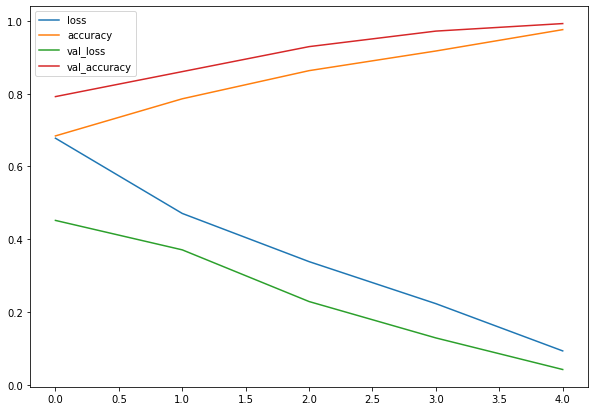

In [100]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [101]:
history_4.history['accuracy']

[0.6840000152587891,
 0.7860000133514404,
 0.8633333444595337,
 0.9173333048820496,
 0.9760000109672546]

In [102]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

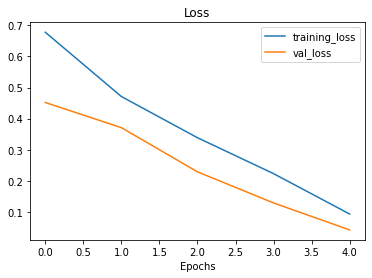

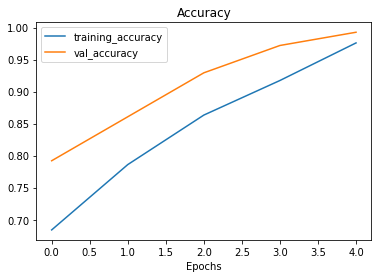

In [103]:
plot_loss_curves(history_4)

In [104]:
model_5 = Sequential([
    Conv2D(10,3,activation = 'relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation ='sigmoid')
])

In [105]:
model_5.compile(loss= 'binary_crossentropy',
                optimizer= Adam(),
                metrics = ['accuracy'])

In [106]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 17s 355ms/step - loss: 0.5854 - accuracy: 0.7033 - val_loss: 0.5268 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 13s 280ms/step - loss: 0.4722 - accuracy: 0.7940 - val_loss: 0.5014 - val_accuracy: 0.7580
Epoch 3/5
47/47 [==============================] - 13s 269ms/step - loss: 0.4714 - accuracy: 0.7833 - val_loss: 0.4088 - val_accuracy: 0.8247
Epoch 4/5
47/47 [==============================] - 13s 272ms/step - loss: 0.4038 - accuracy: 0.8260 - val_loss: 0.4169 - val_accuracy: 0.8073
Epoch 5/5
47/47 [==============================] - 13s 271ms/step - loss: 0.4273 - accuracy: 0.8127 - val_loss: 0.4080 - val_accuracy: 0.8313


In [107]:
model_5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 26, 26, 10)     

In [108]:
model_4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_22 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_10 (Flatten)        (None, 475240)            0         
                                                                 
 dense_18 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


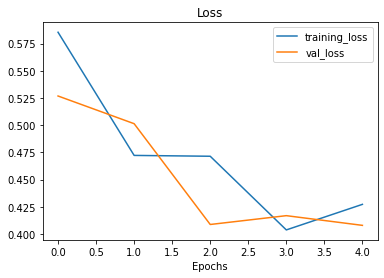

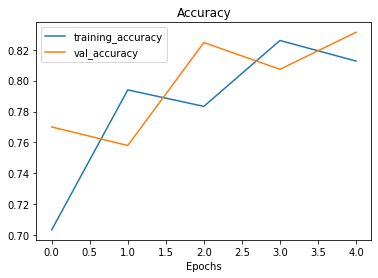

In [109]:
plot_loss_curves(history_5)

### finding Data Augmentation

In [110]:
train_datagen_augmented  = ImageDataGenerator(rescale= 1/255.,
                                               rotation_range= 0.2,
                                               shear_range = 0.2,
                                               zoom_range = 0.2,
                                               width_shift_range= 0.2,
                                               height_shift_range = 0.3,
                                               horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [111]:
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size= (224,224),
                                                                  batch_size = 32,
                                                                  class_mode = 'binary',
                                                                  shuffle = False)
print("Non augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)

print("non augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size  =32,
                                             class_mode  = 'binary')
                                             

Augmented training data
Found 1500 images belonging to 2 classes.
Non augmented training data
Found 1500 images belonging to 2 classes.
non augmented test data
Found 500 images belonging to 2 classes.


In [112]:
images , labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing random number: 10


(-0.5, 223.5, 223.5, -0.5)

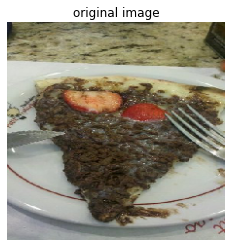

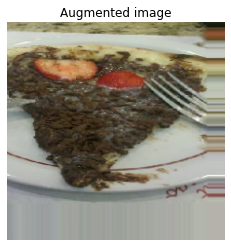

In [113]:
random_number = random.randint(0,32)
print(f'showing random number: {random_number}')
plt.imshow(images[random_number])
plt.title('original image')
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False)

In [114]:
model_6 = Sequential([
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Conv2D(10,3,activation  = 'relu'),
    MaxPool2D(),
    Conv2D(10,3,activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation= 'sigmoid')
])

model_6.compile(loss= 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 463ms/step - loss: 0.6980 - accuracy: 0.4700 - val_loss: 0.6903 - val_accuracy: 0.5200
Epoch 2/5
47/47 [==============================] - 22s 458ms/step - loss: 0.6945 - accuracy: 0.5000 - val_loss: 0.6893 - val_accuracy: 0.5640
Epoch 3/5
47/47 [==============================] - 22s 468ms/step - loss: 0.6896 - accuracy: 0.5133 - val_loss: 0.6772 - val_accuracy: 0.5620
Epoch 4/5
47/47 [==============================] - 21s 453ms/step - loss: 0.6822 - accuracy: 0.5427 - val_loss: 0.6619 - val_accuracy: 0.6540
Epoch 5/5
47/47 [==============================] - 21s 455ms/step - loss: 0.6783 - accuracy: 0.5720 - val_loss: 0.6473 - val_accuracy: 0.6740


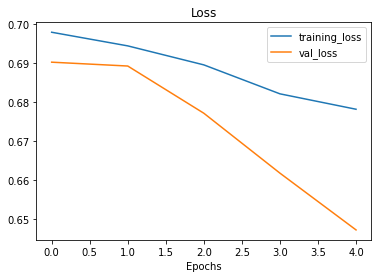

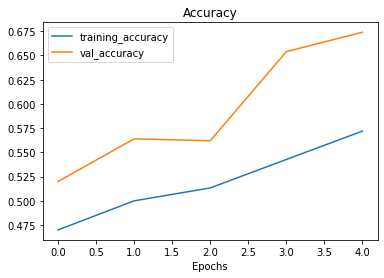

In [115]:
plot_loss_curves(history_6)

In [116]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size = (224,224),
                                                                            batch_size = 32,
                                                                            class_mode = 'binary',
                                                                            shuffle = True)

Found 1500 images belonging to 2 classes.


In [117]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                     
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(), 
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 461ms/step - loss: 0.6783 - accuracy: 0.5527 - val_loss: 0.6394 - val_accuracy: 0.6340
Epoch 2/5
47/47 [==============================] - 22s 458ms/step - loss: 0.6136 - accuracy: 0.6733 - val_loss: 0.5261 - val_accuracy: 0.7400
Epoch 3/5
47/47 [==============================] - 21s 457ms/step - loss: 0.5752 - accuracy: 0.7073 - val_loss: 0.4324 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 21s 456ms/step - loss: 0.5189 - accuracy: 0.7413 - val_loss: 0.3702 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 22s 480ms/step - loss: 0.5000 - accuracy: 0.7567 - val_loss: 0.4265 - val_accuracy: 0.7940


# Make prediction on our trained model with our custom data

In [118]:
print(class_names)

['pizza' 'steak']


In [119]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [120]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')

--2022-08-16 16:07:44--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2022-08-16 16:07:44 (163 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

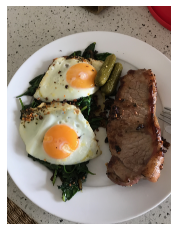

In [121]:
plt.imshow(steak)
plt.axis(False)

In [122]:
steak.shape

(4032, 3024, 3)

In [124]:
steak.shape

(4032, 3024, 3)

In [125]:
def load_and_prep_image(filename, img_shape= 224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size= [img_shape,img_shape])
  img = img/255.
  return img

In [126]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [127]:
pred = model_7.predict(tf.expand_dims(steak,axis = 0))
pred

array([[0.69053674]], dtype=float32)

In [128]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [129]:
def pred_and_plot(model,filename,class_names = class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis = 0))
  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False)

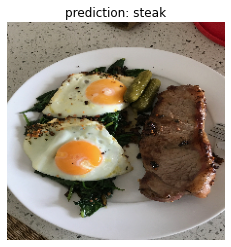

In [130]:
pred_and_plot(model_7, "03-steak.jpeg")

--2022-08-16 16:10:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2022-08-16 16:10:25 (141 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



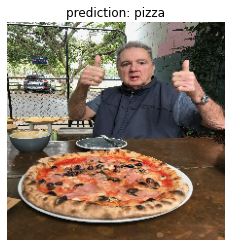

In [132]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")